In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Upload CSV File.
df = pd.read_csv('Iris.csv')


# Return the first 10 rows.
print("\nFirst 10 rows of the DataFrame\n")
print(df.head(10))


# Return DataFrame dimensions.
print("\nDataFrame dimensions")
print("Number of rows : ", df.shape[0], '\nNumber of columns : ', df.shape[1],'\n')




First 10 rows of the DataFrame

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa

DataFrame dimensions
Number of rows :  150 
Number of columns :  6 



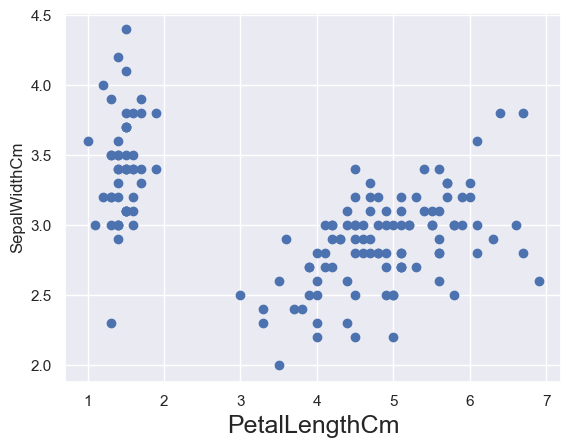

In [2]:
plt.scatter(df['PetalLengthCm'],df['SepalWidthCm'])
# Naming the axes
plt.xlabel('PetalLengthCm',size=18)
plt.ylabel('SepalWidthCm')

plt.show()

In [3]:
df['Species'] = df['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2})

In [4]:
# Return the first 10 rows.
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
5,6,5.4,3.9,1.7,0.4,0
6,7,4.6,3.4,1.4,0.3,0
7,8,5.0,3.4,1.5,0.2,0
8,9,4.4,2.9,1.4,0.2,0
9,10,4.9,3.1,1.5,0.1,0


In [5]:
# The target(s) (dependent variable)
targets = df['Species']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = df.drop(['Species'],axis=1)


# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.3, random_state=44)

In [6]:
x_train.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
145,146,6.7,3.0,5.2,2.3
39,40,5.1,3.4,1.5,0.2
140,141,6.7,3.1,5.6,2.4
60,61,5.0,2.0,3.5,1.0
68,69,6.2,2.2,4.5,1.5
19,20,5.1,3.8,1.5,0.3
35,36,5.0,3.2,1.2,0.2
136,137,6.3,3.4,5.6,2.4
30,31,4.8,3.1,1.6,0.2
127,128,6.1,3.0,4.9,1.8


In [7]:
y_train.head(10)

145    2
39     0
140    2
60     1
68     1
19     0
35     0
136    2
30     0
127    2
Name: Species, dtype: int64

In [8]:
x_test.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
144,145,6.7,3.3,5.7,2.5
9,10,4.9,3.1,1.5,0.1
79,80,5.7,2.6,3.5,1.0
95,96,5.7,3.0,4.2,1.2
104,105,6.5,3.0,5.8,2.2
47,48,4.6,3.2,1.4,0.2
118,119,7.7,2.6,6.9,2.3
107,108,7.3,2.9,6.3,1.8
102,103,7.1,3.0,5.9,2.1
90,91,5.5,2.6,4.4,1.2


In [9]:
y_test.head(10)

144    2
9      0
79     1
95     1
104    2
47     0
118    2
107    2
102    2
90     1
Name: Species, dtype: int64

In [10]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', epsilon=0.07, max_iter=150)

clf.fit(x_train, y_train)

C:\Users\amala\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(epsilon=0.07, max_iter=150, solver='lbfgs')

In [11]:
#accuracy
clf.score(x_test,y_test)

0.9555555555555556

In [12]:
#temps de reponse??
import time
start = time.time()
y_pred = clf.predict(x_test)
print("temps de reponse : %s" % (time.time() - start))

temps de reponse : 0.001995563507080078


In [13]:
y_test.to_numpy()

array([2, 0, 1, 1, 2, 0, 2, 2, 2, 1, 0, 1, 0, 2, 0, 0, 2, 1, 0, 2, 1, 2,
       2, 1, 2, 2, 0, 1, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 2, 0,
       0], dtype=int64)

In [14]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

cm

array([[15,  2,  0],
       [ 0, 13,  0],
       [ 0,  0, 15]], dtype=int64)

C:\Users\amala\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


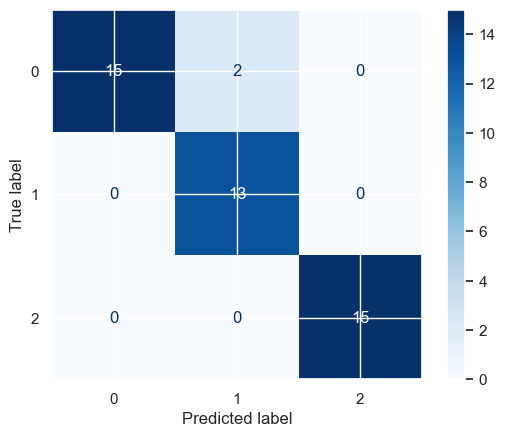

In [15]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, x_test, y_test, cmap=plt.cm.Blues)
plt.show()


# learning_rate_init : float, default=0.001

## Only used when solver=’sgd’ or ‘adam’.

### The initial learning rate used. It controls the step-size in updating the weights. 

In [16]:
clf2 = MLPClassifier(solver='adam', epsilon=0.07, max_iter=1500,
                    learning_rate_init = 0.7)
clf2.fit(x_train, y_train)

clf.score(x_test,y_test)

0.9555555555555556